# Released under MIT License

Copyright (c) 2013 Mark Otto.

Copyright (c) 2017 Andrew Fong.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset

# About Dataset

***Dataset Summary***

The Animal Image Classification Dataset is a comprehensive collection of images tailored for the development and evaluation of machine learning models in the field of computer vision. It contains 3,000 JPG images, carefully segmented into three classes representing common pets and wildlife: cats, dogs, and snakes.

Dataset Contents
cats/: A set of 1,000 JPG images of cats, showcasing a wide array of breeds, environments, and postures.

dogs/: A diverse compilation of 1,000 dog images, capturing a multitude of breeds in various activities and settings.

snakes/: An assortment of 1,000 images of snakes, depicting numerous species in both natural and controlled habitats. Image Details:

Resolution: Each image maintains a uniform resolution of 256x256 pixels, providing clarity and consistency for model training.

File Format: JPG Color Space: RGB

Intended Applications
This dataset is primed for use in developing and testing AI models specialized in multi-class animal recognition. It offers valuable resources for researchers and hobbyists in fields such as zoology, pet technology, and biodiversity conservation.

Acknowledgements and Licensing
This dataset is a collective effort of various photographers and organizations. All images are distributed with permissions for academic and non-commercial usage, provided that proper attribution is given to the original sources.

# Про набір даних

***Короткий опис набору даних***

Набір даних «Класифікація зображень тварин» - це повна колекція зображень, призначена для розробки та оцінки моделей машинного навчання в галузі комп'ютерного зору. Він містить 3 000 зображень у форматі JPG, ретельно сегментованих на три класи, що представляють найпоширеніших домашніх та диких тварин: котів, собак та змій.

Зміст набору даних
cats/: Набір з 1,000 JPG зображень котів, що демонструють широкий спектр порід, середовищ та поз.

собаки/: Різноманітна добірка з 1,000 зображень собак, що демонструє безліч порід у різних видах діяльності та середовищах.

змії/: Підбірка з 1 000 зображень змій, на яких зображені численні види як у природному, так і в контрольованому середовищі існування. Деталі зображення:

Роздільна здатність: Кожне зображення має однакову роздільну здатність 256x256 пікселів, що забезпечує чіткість і послідовність для навчання моделі.

Формат файлу: JPG Колірний простір: RGB

Призначення
Цей набір даних призначений для використання при розробці та тестуванні моделей штучного інтелекту, що спеціалізуються на розпізнаванні тварин різних класів. Він пропонує цінні ресурси для дослідників і аматорів у таких галузях, як зоологія, технології для домашніх тварин і збереження біорізноманіття.

Подяки та ліцензування
Цей набір даних є результатом колективних зусиль різних фотографів та організацій. Всі зображення розповсюджуються з дозволом на академічне та некомерційне використання за умови належного посил

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping
from keras.applications import MobileNetV2

import matplotlib.pyplot as plt

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [3]:
import tensorflow as tf

image_size = (256, 256)
batch_size = 32
data_dir = '../../classification/animal/data/'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
class_names = train_ds.class_names


Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [4]:
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("First label (one-hot):", labels[0].numpy())
    print("Corresponding class:", tf.argmax(labels[0]).numpy())
    print("Class name:", train_ds.class_names[tf.argmax(labels[0]).numpy()])

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32, 3)
First label (one-hot): [0. 1. 0.]
Corresponding class: 1
Class name: dogs


2025-05-09 10:47:15.594944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
for images, labels in train_ds.take(1):
    print("Кількість зразків у класах (тренувальний батч):")
    print(np.sum(labels, axis=0))

Кількість зразків у класах (тренувальний батч):
[10. 12. 10.]


2025-05-09 10:47:17.855788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
from collections import Counter

total_counts = Counter()
for _, labels in train_ds.unbatch():
    class_idx = tf.argmax(labels).numpy()
    total_counts[class_idx] += 1

print("Кількість зразків у кожному класі (весь train_ds):")
for idx, count in sorted(total_counts.items()):
    print(f"{train_ds.class_names[idx]}: {count}")

Кількість зразків у кожному класі (весь train_ds):
cats: 800
dogs: 805
snakes: 795


2025-05-09 10:47:23.985660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Препроцесинг

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(256, 256, 3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

In [ ]:
# history = model.fit(
#     train_ds,
#     epochs=10,
#     validation_data=test_ds
# )

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

/Users/mariiasv/Documents/Project/junior-ds-prep/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,          
    restore_best_weights=True 
)

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30, 
    callbacks=[early_stop]
)

Epoch 1/30


2025-05-09 10:47:37.701850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.4236 - loss: 1.3010 - val_accuracy: 0.6150 - val_loss: 0.7738
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.6003 - loss: 0.7925 - val_accuracy: 0.5350 - val_loss: 0.8443
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.6175 - loss: 0.7867 - val_accuracy: 0.6250 - val_loss: 0.7646
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.6357 - loss: 0.7632 - val_accuracy: 0.5983 - val_loss: 0.7394
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.6585 - loss: 0.7136 - val_accuracy: 0.7000 - val_loss: 0.6475
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.6830 - loss: 0.6950 - val_accuracy: 0.6617 - val_loss: 0.7533
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.7051 - loss: 0.6808 - val_accuracy: 0.6450 - val_loss: 0.8805
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.7196 - loss: 0.6994 - val_accuracy: 0.686

In [12]:
loss, acc = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6724 - loss: 0.7016
Test accuracy: 0.70


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


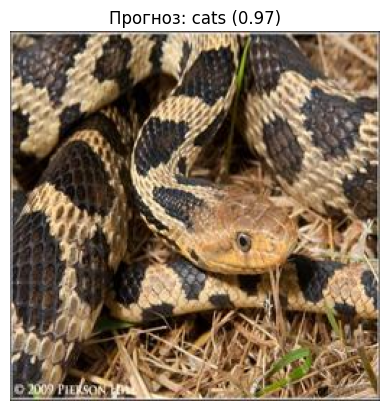

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


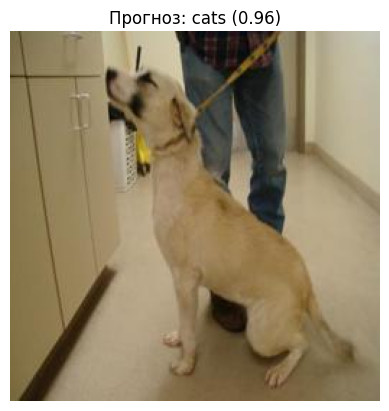

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


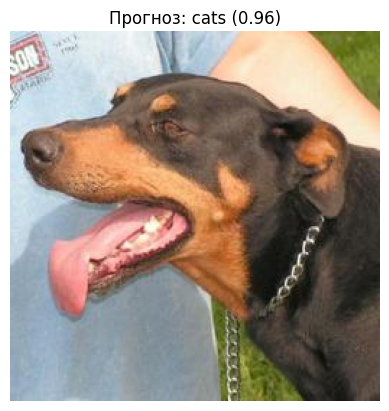

In [14]:
def predict_and_plot(img_path, model, class_names, image_size=(256, 256)):
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)

    # pred = model.predict(img_array)[0]
    pred = tf.squeeze(model.predict(img_array)).numpy()

    predicted_class_idx = np.argmax(pred)
    confidence = np.max(pred)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Прогноз: {class_names[predicted_class_idx]} ({confidence:.2f})")
    plt.show()

predict_and_plot('../../classification/animal/data/snakes/2_0958.jpg', model, class_names)
predict_and_plot('../../classification/animal/data/dogs/1_0003.jpg', model, class_names)
predict_and_plot('../../classification/animal/data/dogs/1_0005.jpg', model, class_names)

In [15]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Спочатку заморожуємо

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=[early_stop]
)


/var/folders/d0/mjmhllkj3wd4_815j1243vqc0000gn/T/ipykernel_26977/958721701.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.8011 - loss: 0.5070 - val_accuracy: 0.9667 - val_loss: 0.1119
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.9864 - loss: 0.0665 - val_accuracy: 0.9733 - val_loss: 0.0839
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.9915 - loss: 0.0464 - val_accuracy: 0.9733 - val_loss: 0.0843
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.9915 - loss: 0.0422 - val_accuracy: 0.9767 - val_loss: 0.0746
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.9961 - loss: 0.0281 - val_accuracy: 0.9767 - val_loss: 0.0757
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.9951 - loss: 0.0301 - val_accuracy: 0.9783 - val_loss: 0.0723
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.9964 - loss: 0.0227 - val_accuracy: 0.9767 - val_loss: 0.0713
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.9948 - loss: 0.0228 - val_accuracy: 0

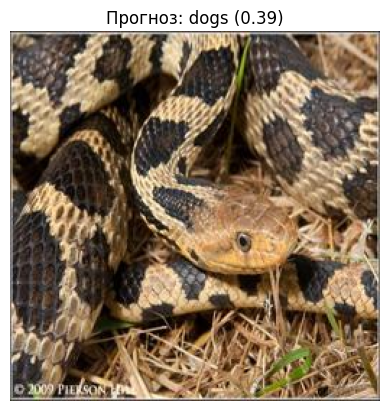

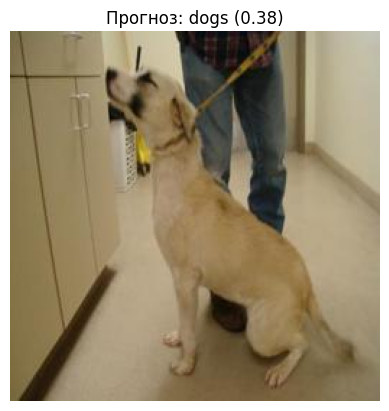

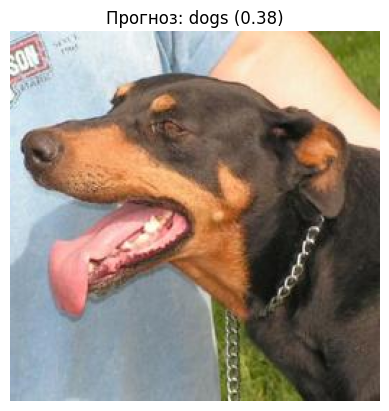

In [16]:
def predict_and_plot(img_path, model, class_names, image_size=(256, 256)):
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)

    # pred = model.predict(img_array)[0]
    # pred = tf.squeeze(model.predict(img_array)).numpy()
    pred = model.predict(img_array, verbose=0)[0]

    predicted_class_idx = np.argmax(pred)
    confidence = np.max(pred)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Прогноз: {class_names[predicted_class_idx]} ({confidence:.2f})")
    plt.show()

predict_and_plot('../../classification/animal/data/snakes/2_0958.jpg', model, class_names)
predict_and_plot('../../classification/animal/data/dogs/1_0003.jpg', model, class_names)
predict_and_plot('../../classification/animal/data/dogs/1_0005.jpg', model, class_names)

#  5. Побудова моделі на базі MobileNetV2 

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int')

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int' )


Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [18]:
from keras.utils import to_categorical

def preprocess_data(image, label):
    label = tf.one_hot(label, depth=len(class_names))  # One-hot encoding
    return image, label

train_ds = train_ds.map(preprocess_data)
test_ds = test_ds.map(preprocess_data)


In [19]:
for images, labels in train_ds.take(1):
    print("Image shape:", images.shape)  # Має бути (batch_size, 256, 256, 3)
    print("Label shape:", labels.shape)  # Має бути (batch_size, num_classes)


Image shape: (32, 256, 256, 3)
Label shape: (32, 3)


2025-05-09 11:06:52.540082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
from keras.applications import MobileNetV2
from keras import layers, models

base_model = MobileNetV2(input_shape=image_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=10, callbacks=[early_stop])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



/var/folders/d0/mjmhllkj3wd4_815j1243vqc0000gn/T/ipykernel_26977/2435382601.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=image_size + (3,), include_top=False, weights='imagenet')


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.4359 - loss: 1.1042 - val_accuracy: 0.6667 - val_loss: 0.7722
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.6168 - loss: 0.7996 - val_accuracy: 0.6800 - val_loss: 0.7020
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.6862 - loss: 0.7174 - val_accuracy: 0.6550 - val_loss: 0.7581
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.6745 - loss: 0.7125 - val_accuracy: 0.7050 - val_loss: 0.6663
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.7044 - loss: 0.6608 - val_accuracy: 0.6817 - val_loss: 0.6952
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.7215 - loss: 0.6372 - val_accuracy: 0.6867 - val_loss: 0.6660
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.7326 - loss: 0.6058 - val_accuracy: 0.6933 - val_loss: 0.6518
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.7507 - loss: 0.5832 - val_accuracy: 0

In [ ]:
def predict_and_plot(img_path, model, class_names, image_size=image_size):
    img = load_img(img_path, target_size=image_size)  # Завантаження
    img_array = img_to_array(img)  # Перетворення у масив
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Препроцесинг
    img_array = tf.expand_dims(img_array, 0)  # Додаємо batch розмір (1, h, w, 3)

    pred = model.predict(img_array, verbose=0)[0]
    predicted_class_idx = np.argmax(pred)
    confidence = np.max(pred)

    plt.imshow(img_array[0].astype("uint8"))
    plt.axis('off')
    plt.title(f"Прогноз: {class_names[predicted_class_idx]} ({confidence:.2f})")
    plt.show()
